In [5]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [6]:
#Cargar y organizar los datos de potencial (11 x 14)
datos_str = """\
9.98  9.73  9.82  10.14 10.27 10.13 10.13 10.10 10.22 10.29 10.15 9.88  9.70  9.81
11.52 11.47 11.79 11.88 11.82 11.64 11.71 11.73 11.71 11.50 11.39 10.85 10.77 10.60
12.75 12.97 13.05 13.37 13.74 13.01 13.00 12.78 12.83 12.50 12.35 12.40 11.70 11.45
14.34 14.47 14.66 14.75 14.67 14.36 14.27 14.33 14.16 13.88 13.48 13.15 12.61 12.26
15.70 15.82 15.89 15.95 15.95 16.04 15.70 15.56 15.40 15.12 14.75 14.24 13.44 13.08
17.05 17.10 17.14 17.25 17.38 17.27 17.03 17.01 16.80 16.51 16.00 15.21 14.36 13.83
18.41 18.46 18.32 18.69 18.67 18.55 18.59 18.51 18.55 18.32 17.82 16.14 14.89 14.51
19.87 19.87 19.87 19.87 19.87 19.87 19.87 19.87 19.87 19.87 19.87 16.83 15.51 15.08
19.86 19.88 19.85 19.85 19.84 19.83 19.82 19.80 19.75 19.64 19.13 17.33 15.92 15.45
19.85 19.85 19.84 19.83 19.82 19.80 19.77 19.71 19.62 19.31 18.71 17.34 16.14 15.75
19.84 19.84 19.83 19.81 19.81 19.78 19.73 19.66 19.59 19.21 18.48 17.29 16.25 15.87
"""

# Convertimos la cadena en un array 2D de floats
lineas = datos_str.strip().split('\n')
matriz_potencial = np.array([list(map(float, l.split())) for l in lineas])

print("Forma de la matriz de potencial:", matriz_potencial.shape)  

Forma de la matriz de potencial: (11, 14)


In [7]:
#Definir coordenadas (x,y) originales

x_original = np.linspace(0, 13, 14)
y_original = np.linspace(0, 10, 11)

Xo, Yo = np.meshgrid(x_original, y_original)

puntos_originales = np.column_stack([Xo.ravel(), Yo.ravel()])
valores_originales = matriz_potencial.ravel()

In [8]:
# Reflejar datos a la izquierda (x' = -x)
Xo_reflejado = -Xo
Yo_reflejado = Yo  

puntos_reflejados = np.column_stack([Xo_reflejado.ravel(), Yo_reflejado.ravel()])
valores_reflejados = matriz_potencial.ravel()

# Unimos original + reflejado
puntos_totales = np.vstack([puntos_originales, puntos_reflejados])
valores_totales = np.concatenate([valores_originales, valores_reflejados])

In [9]:
#Crear una malla más fina e interpolar
# Ahora el dominio en x va de -13 a +13, y en y de 0 a 10
nx, ny = 200, 100  # Ajusta la resolución
x_nuevo = np.linspace(-13, 13, nx)
y_nuevo = np.linspace(0, 10, ny)

Xn, Yn = np.meshgrid(x_nuevo, y_nuevo)

# Interpolamos (métodos: 'linear', 'cubic', 'nearest')
Zn = griddata(puntos_totales, valores_totales, (Xn, Yn), method='cubic')


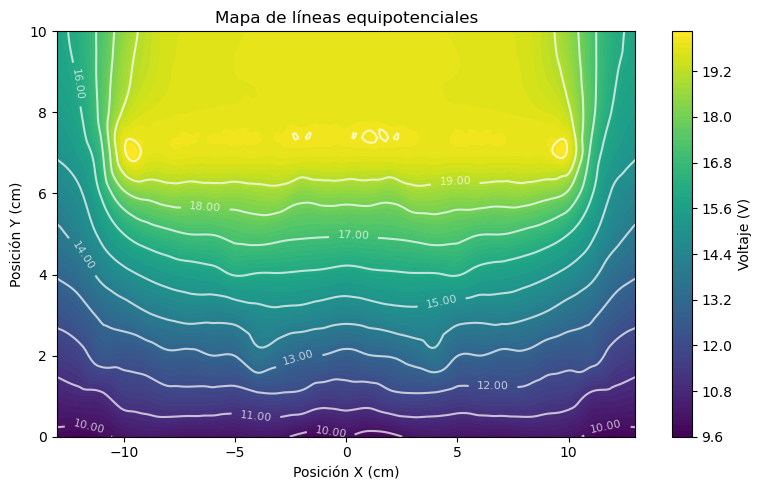

In [11]:
#Graficar el mapa de calor y líneas de equipotencial
# -------------------------------------------------------------
plt.figure(figsize=(8, 5))

# Generamos el mapa de calor (contourf) y guardamos la referencia en 'cs'
cs = plt.contourf(Xn, Yn, Zn, levels=100, cmap='viridis')

# Creamos la barra de color asociada al mapa de calor
cbar = plt.colorbar(cs)
cbar.set_label("Voltaje (V)")

# Dibujamos líneas de contorno (equipotenciales)
contornos = plt.contour(Xn, Yn, Zn, levels=10, colors='white', alpha=0.7)
plt.clabel(contornos, inline=True, fontsize=8, fmt="%.2f")

plt.title("Mapa de líneas equipotenciales")
plt.xlabel("Posición X (cm)")
plt.ylabel("Posición Y (cm)")
plt.tight_layout()
plt.show()


